# Analyzing Sales Performance of a Digital Music Store

In this project, we will explore the Chinook database, which is a fictional digital music store. We will analyze the sales performance of different genres and countries, as well as the performance of the sales team. We will try to find the answers to the following questions:
- What genres are the most popular?
- Are there any popular genres that also have a large proportion of unpurchased tracks?
- Which countries have the most potentential for growth?
- Are there any sales support representatives that are performing worse or better than the others?

The database schema is shown below. <img src="chinookdiagram.png" width="800">

## Summary of Results

After analyzing the data, we can conclude the following:
- Rock tracks are the most purchased genre, but Latin, Metal, and Alternative & Punk tracks are popular as well.
- The four most popular genres also have a high percentage of unpurchased tracks.
- The USA has both the highest number of orders and total sales, while the Czech Republic has both the highest average sales per customer and sales per order.
- All of the sales support representatives have similar average sales numbers. 

## Introduction
First, we will import the necessary packages and define two functions: one to read queries, and one to read commands. These functions will make running commands and queries easier.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def run_query(query):
    with sqlite3.connect("chinook.db") as conn:
        return pd.read_sql(query, conn)

In [3]:
def run_command(query):
    with sqlite3.connect("chinook.db") as conn:
        return conn.execute(query)

## Popular Genres 

First, we would like to know the most popular genres. We will run a query that returns the number of tracks sold and the percentage of the total tracks sold for each genre. We will then graph our results.

In [4]:
query1 = '''
            WITH
                total_tracks_sold AS
                    (
                        SELECT 
                            g.Name Genre,
                            SUM(ii.Quantity) NumberSold
                        FROM invoice_items ii
                        INNER JOIN tracks t on t.TrackID = ii.TrackID
                        INNER JOIN genres g on g.GenreID = t.GenreID
                        GROUP BY 1
                    )
            SELECT 
                Genre,
                NumberSold,
                (CAST(NumberSold AS FLOAT) / (SELECT SUM(NumberSold) FROM total_tracks_sold)) * 100 PercentofTotal
            FROM total_tracks_sold tts
            GROUP BY 1
            ORDER BY 2 DESC;
    '''
run_query(query1)

,Genre,NumberSold,PercentofTotal
0,Rock,835,37.276786
1,Latin,386,17.232143
2,Metal,264,11.785714
3,Alternative & Punk,244,10.892857
4,Jazz,80,3.571429
5,Blues,61,2.723214
6,TV Shows,47,2.098214
7,Classical,41,1.830357
8,R&B/Soul,41,1.830357
9,Reggae,30,1.339286


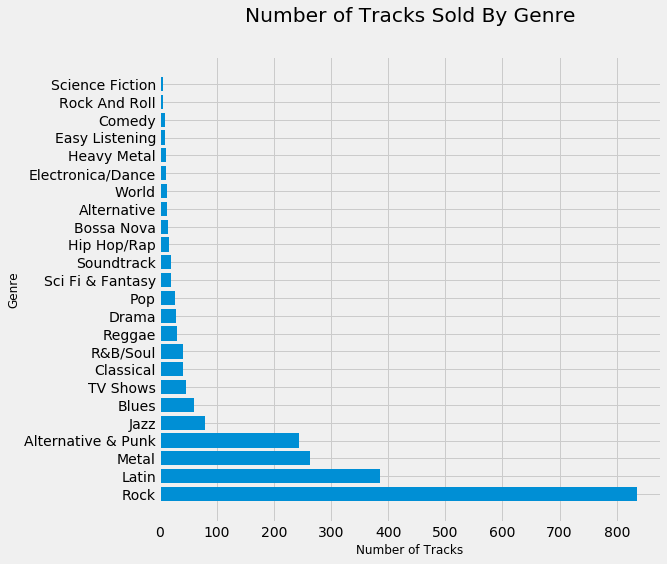

In [13]:
q1 = run_query(query1)

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (8,8))

#Create a horizontal bar plot of total tracks sold by genre
ax.barh(y = q1["Genre"], width = q1["NumberSold"])

#Label the axes and set title
ax.set_xlabel('Number of Tracks', fontsize = 12)
ax.set_ylabel('Genre', fontsize = 12)
ax.set_title('Number of Tracks Sold By Genre', y = 1.06)

plt.show()

The most popular genre is Rock, which has sold over twice as many tracks as the second most popular genre, Latin. We can see a distinction between the four most popular genres and the remaining genres: the four most popular have all sold over 200, and the remaining genres have not yet sold 100 tracks. Based off of this data, we might recommend adding more Rock tracks if the company was interested in adding more tracks; we might also suggest some Latin, Metal, and Alternative & Punk tracks as well.

## Unpurchased Tracks

Now, we are interested in the number of unpurchased tracks by genre. We will run a query that returns the number of unique tracks sold, the total number of tracks, and the percentage of tracks sold per genre. We will then visualize the results.

In [29]:
query2 = '''
        SELECT 
            g.Name Genre,
            COUNT(DISTINCT ii.TrackID) NumberSold,
            COUNT(t.TrackID) TotalTracks,
            100 - (CAST(COUNT(DISTINCT ii.TrackID) AS FLOAT) / COUNT(t.TrackID) * 100) PercentageUnsold
        FROM tracks t
        LEFT JOIN invoice_items ii ON ii.TrackID = t.TrackID
        LEFT JOIN genres g on g.GenreID = t.GenreID
        GROUP BY 1
        ORDER BY 4 DESC
     '''

run_query(query2)

,Genre,NumberSold,TotalTracks,PercentageUnsold
0,Opera,0,1,100.000000
1,Alternative,14,40,65.000000
2,Electronica/Dance,11,31,64.516129
3,Science Fiction,5,14,64.285714
4,Hip Hop/Rap,15,37,59.459459
5,Drama,27,66,59.090909
6,Easy Listening,10,24,58.333333
7,Heavy Metal,12,28,57.142857
8,Soundtrack,19,44,56.818182
9,TV Shows,43,97,55.670103


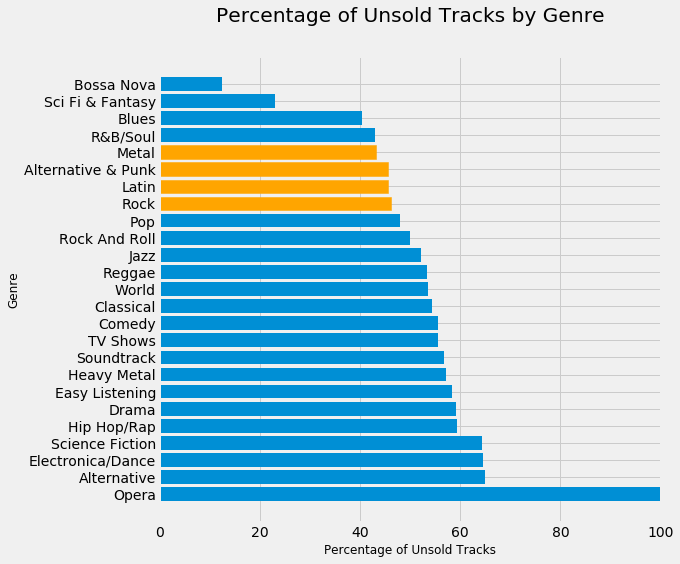

In [30]:
q2 = run_query(query2)

fig, ax = plt.subplots(figsize = (8,8))

#Create a horizontal bar plot of total tracks sold by genre
graph = ax.barh(y = q2["Genre"], width = q2["PercentageUnsold"])

#Label the axes, set title, and create grid
ax.set_xlabel('Percentage of Unsold Tracks', fontsize = 12)
ax.set_xlim(0, 100)
ax.set_ylabel('Genre', fontsize = 12)
ax.set_title('Percentage of Unsold Tracks by Genre', y = 1.06)

#Highlight the most popular genres
for i in range(len(graph)):
    if ((q2["Genre"].iloc[i] == "Rock") or (q2["Genre"].iloc[i] == "Latin") or 
        (q2["Genre"].iloc[i] == "Metal") or (q2["Genre"].iloc[i] == "Alternative & Punk")):
        graph[i].set_color('orange')

plt.show()

Interestingly, we can see that our four most popular genres, as highlighted above, all have similar percentages of unsold tracks. We can also see that all four genres have sold less than half of the tracks available in the Chinook store. Therefore, adding more songs in these genres might not necessarily be profitable. 

## Sales By Country
Now that we have analyzed our sales by genre, we will look at sales by country. We will run a query that returns the total customers, total sales, average sales per customer, and average sales per order for each country. Because there are a number of countries with only one customer, we will group these countries in an 'Other' category.

In [33]:
query3 = '''
         WITH 
                country_data AS
                (
          SELECT
              Country,
              COUNT(DISTINCT customer) TotalCustomers,
              SUM(Total) TotalSales,
              COUNT(Orders) TotalOrders
            FROM
                 (
                    SELECT
                        CASE 
                            WHEN 
                                (
                                SELECT COUNT(*) FROM customers
                                WHERE Country = c.Country
                                ) = 1 THEN "Other"
                             ELSE c.Country
                        END AS Country,
                        i.CustomerId Customer,
                        Total Total,
                        InvoiceId Orders
                    FROM customers c
                    INNER JOIN invoices i on c.CustomerId = i.CustomerId
                 )
            GROUP BY 1
                )
            SELECT 
                Country,
                TotalCustomers,
                TotalSales,
                AvgSalesPerCustomer,
                AvgSalesPerOrder
            FROM
             (
                SELECT 
                    Country,
                    TotalCustomers,
                    TotalSales,
                    TotalSales/TotalCustomers AvgSalesPerCustomer,
                    TotalSales/TotalOrders AvgSalesPerOrder,
                    CASE
                        WHEN Country = "Other" THEN 1
                        ELSE 0
                    END AS Sort
                FROM country_data
                GROUP BY Country
                ORDER BY Sort, Country
            )
            
            '''
run_query(query3)

,Country,TotalCustomers,TotalSales,AvgSalesPerCustomer,AvgSalesPerOrder
0,Brazil,5,190.10,38.020000,5.431429
1,Canada,8,303.96,37.995000,5.427857
2,Czech Republic,2,90.24,45.120000,6.445714
3,France,5,195.10,39.020000,5.574286
4,Germany,4,156.48,39.120000,5.588571
5,India,2,75.26,37.630000,5.789231
6,Portugal,2,77.24,38.620000,5.517143
7,USA,13,523.06,40.235385,5.747912
8,United Kingdom,3,112.86,37.620000,5.374286
9,Other,15,604.30,40.286667,5.755238


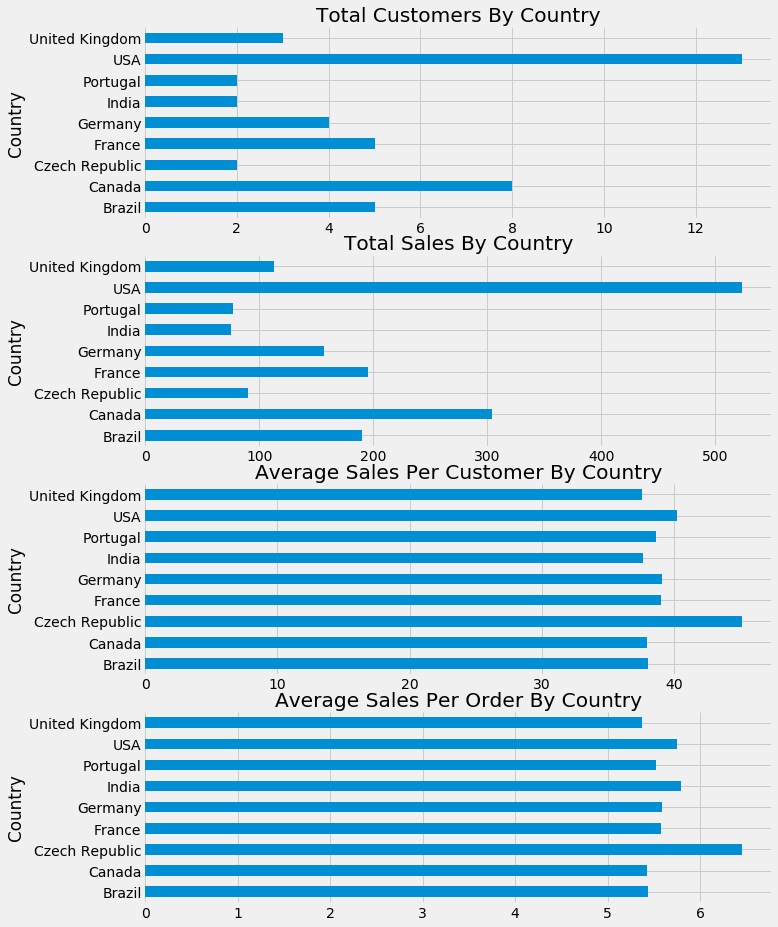

In [38]:
q3 = run_query(query3)
q3 = q3[q3["Country"] != "Other"]
q3.set_index("Country", drop=True, inplace=True)

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(4, 1, 1)
q3[ "TotalCustomers"].plot.barh(ax = ax1, title = "Total Customers By Country")
ax1.set_xlabel('')
for key,spine in ax1.spines.items():
    spine.set_visible(False)
ax1.tick_params(bottom=False, top=False, left=False, right=False)

ax2 = fig.add_subplot(4, 1, 2)
q3[ "TotalSales"].plot.barh(ax = ax2, title = "Total Sales By Country")
ax2.set_xlabel('')
for key,spine in ax2.spines.items():
    spine.set_visible(False)
ax2.tick_params(bottom=False, top=False, left=False, right=False)

ax3 = fig.add_subplot(4, 1, 3)
q3[ "AvgSalesPerCustomer"].plot.barh(ax = ax3, title = "Average Sales Per Customer By Country")
ax3.set_xlabel('')
for key,spine in ax3.spines.items():
    spine.set_visible(False)
ax3.tick_params(bottom=False, top=False, left=False, right=False)

ax4 = fig.add_subplot(4, 1, 4)
q3[ "AvgSalesPerOrder"].plot.barh(ax = ax4, title = "Average Sales Per Order By Country")
ax4.set_xlabel('')
for key,spine in ax4.spines.items():
    spine.set_visible(False)
ax4.tick_params(bottom=False, top=False, left=False, right=False)
plt.show()



We can see that while the USA has the highest total customers and highest total sales, the average sales per customer and per order are similar to the averages of the other countries. In fact, there is only one country that appears to have significantly higher values for average sales per customer and per order: the Czech Republic. However, the Czech Republic only has two customers. The higher values for average sales could be chance; as more customers make purchases, the average sales per customer and per order might decrease and become more similar to the values of the other countries. However, it is also possible that customers in the Czech Republic tend to spend more than customers from other countries. More data from the Czech Republic would be needed to determine which of the two scenarios is true.  

## Sales By Employee
Now that we have analyzed sales by genre and country, we will look at the sales of the sales support agents. We will run a query that returns the hire date, total sales, number of sales, and average sales per order for each sales support agent. We will then visualize the results.

In [31]:
query3 = '''
            WITH
                total_per_customer AS
                    (
                        SELECT 
                            CustomerId,
                            SUM(total) TotalSpent
                        FROM invoices
                        GROUP BY 1
                    ),
                num_sales_per_employee AS
                    (
                        SELECT 
                            c.SupportRepId EmployeeId,
                            COUNT(i.InvoiceId) NumSales
                        FROM invoices i
                        LEFT JOIN customers c on i.CustomerId = c.CustomerId
                        GROUP BY 1
                    )
            SELECT 
                e.FirstName || " " || e.LastName EmployeeName,
                HireDate,
                SUM(tpc.TotalSpent) TotalSales,
                nspe.NumSales NumSales,
                ROUND(SUM(tpc.TotalSpent)/nspe.NumSales, 2) AvgSales    
            FROM employees e
            LEFT JOIN customers c ON c.SupportRepId = e.EmployeeId
            LEFT JOIN total_per_customer tpc ON c.CustomerId = tpc.CustomerId
            LEFT JOIN num_sales_per_employee nspe ON nspe.EmployeeId = e.EmployeeId
            WHERE e.Title = "Sales Support Agent"
            GROUP BY EmployeeName
            ORDER BY TotalSales DESC
        '''

run_query(query3)

,EmployeeName,HireDate,TotalSales,NumSales,AvgSales
0,Jane Peacock,2002-04-01 00:00:00,833.04,146,5.71
1,Margaret Park,2003-05-03 00:00:00,775.40,140,5.54
2,Steve Johnson,2003-10-17 00:00:00,720.16,126,5.72


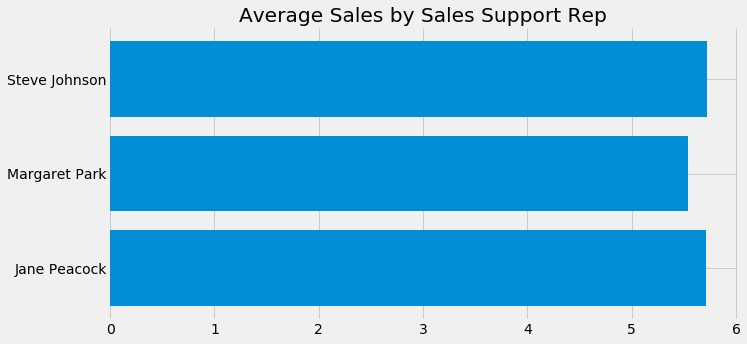

In [32]:
q3 = run_query(query3)

fig, ax = plt.subplots(figsize = (10, 5))
ax.barh(y = q3["EmployeeName"], width = q3["AvgSales"])
ax.set_xlabel('')

ax.set_title('Average Sales by Sales Support Rep')

for key,spine in ax.spines.items():
    spine.set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)

We can see that while Jane Peacock has the highest total sales, the average sale value for each sales support rep is relatively similar. The difference in total sales for each employee can very likely be explained by their hire date; the employees hired at a later date have a lower total sale value. Overall, the sales support rep team seem to all be doing similarly in sales.